# Assignment

# Objective of TV ad budget prediction project:

#### Given a dataset containing two variables, TV advertising budget (in thousands of dollars) and sales (in thousands of units), what is the relationship between TV advertising expenditure and sales?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('tvmarketing.csv')

In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
df.columns

Index(['TV', 'Sales'], dtype='object')

# Variable Description
#### * Target Variable(y):TV
#### * Independent variable(x):Sales

In [5]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [6]:
df.shape

(200, 2)

In [7]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [8]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [9]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

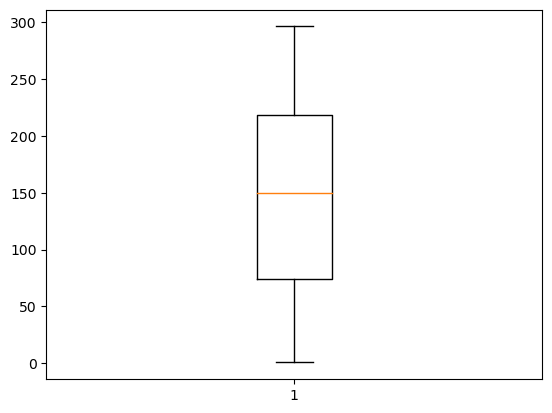

In [10]:
# check outlier in numeric columns
plt.boxplot(df['TV'])
plt.show()

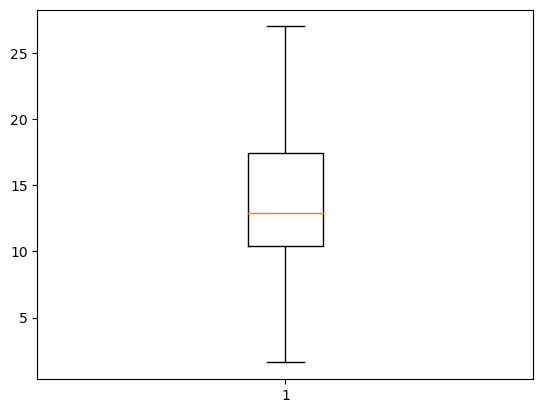

In [11]:
plt.boxplot(df['Sales'])
plt.show()

# EDA
#### * Distribution  # for numerical variable
#### * Data Mix  # for catrgorical variable
#### * correlation

In [13]:
df.columns # checking the data using eda

Index(['TV', 'Sales'], dtype='object')

In [14]:
df.shape

(200, 2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_18592\2926773584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TV'])


<Axes: xlabel='TV', ylabel='Density'>

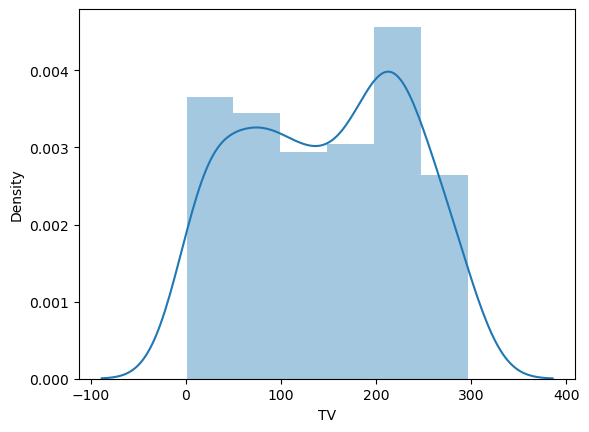

In [15]:
sns.distplot(df['TV'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_18592\4256165467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

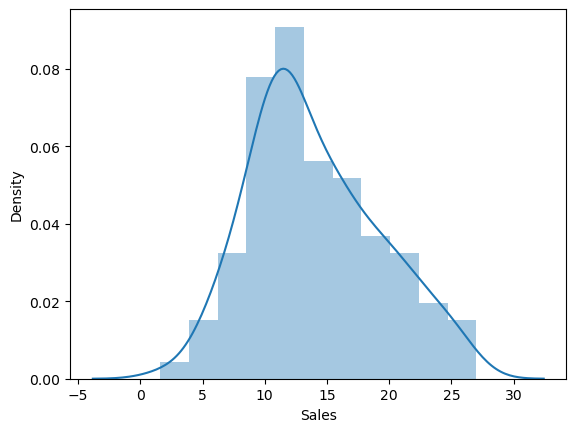

In [16]:
sns.distplot(df['Sales'])

In [32]:
# check data mix for categorical variable
# TV,Sales

<Axes: xlabel='TV'>

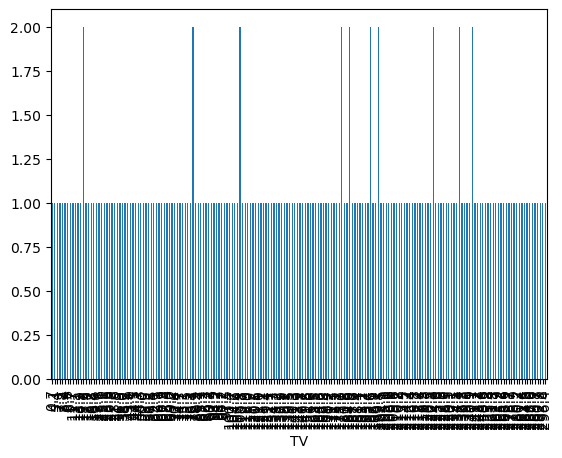

In [18]:
df.groupby('TV')['TV'].count().plot(kind='bar')

<Axes: xlabel='Sales'>

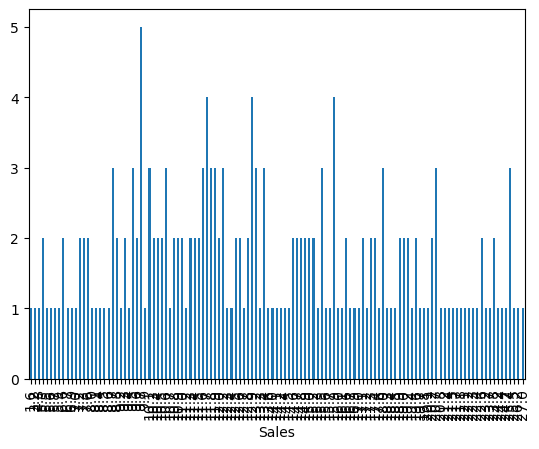

In [19]:
df.groupby('Sales')['Sales'].count().plot(kind='bar')

# Pearson Correlation

In [20]:
# create a set of numeric columns
df_numeric=df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: >

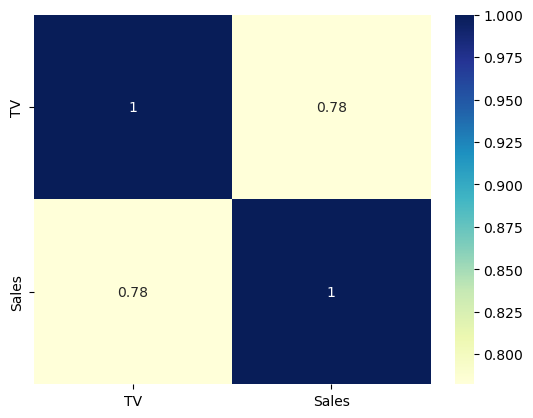

In [21]:
# create heat map
sns.heatmap(df_numeric.corr(),cmap='YlGnBu',annot=True)

#### ---------End of EDA---------

In [39]:
# check if there is any problem in categorical variables.
# like spelling difference,case sensitive value ie,Male,male

In [22]:
df.columns

Index(['TV', 'Sales'], dtype='object')

In [23]:
df['TV'].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

In [24]:
df['Sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

# Dummy Conversion

In [25]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [29]:
# create x and y

x=df.drop('TV',axis=1)

y=df['TV']

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=999)

In [32]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(140, 1) (60, 1) (140,) (60,)


# Feature Selection

In [36]:
#  create a key_feature object to select the top k features

key_features=SelectKBest(score_func=f_regression,k=1) 

# fit the key features of training data and transform it
xtrain_selected=key_features.fit_transform(xtrain,ytrain)

# get the indices of the selected features
selected_indices=key_features.get_support(indices=True)

# get the indices of the selected features
selected_features=xtrain.columns[selected_indices]

In [37]:
selected_features

Index(['Sales'], dtype='object')

# Build Linear Regression Model

In [38]:
linreg=LinearRegression()


linreg.fit(xtrain_selected,ytrain)


linreg.score(xtrain_selected,ytrain)

0.6010174583630749

In [39]:
xtest_selected=xtest.iloc[:,selected_indices]
score=linreg.score(xtest_selected,ytest)
score

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.6172248853247343

In [40]:
predicted_price=linreg.predict(xtest_selected)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [41]:
print(predicted_price)

[173.02474889 160.9978841  246.52225597 118.23569816 290.62076022
 136.9441545  116.89937985 277.25757712 167.67947565 114.22674322
  87.50037701 139.61679113 159.66156579 213.11429821 310.66553488
 238.50434611 230.48643625 115.56306154 182.37897707 120.90833478
 104.87251505 115.56306154 152.97997423 237.1680278  159.66156579
  67.45560235 201.08743341 107.54515167 243.84961935 155.65261085
 301.31130671  58.10137418 147.63470099 186.387932   205.09638835
  54.09241925 111.5541066  123.5809714  257.21280246 102.19987843
 286.61180529  84.82774039 -18.06876952 299.9749884  213.11429821
  34.04764459 165.00683903 214.45061652  90.17301363 163.67052072
 110.21778829 237.1680278  201.08743341 131.59888126  90.17301363
 100.86356012 270.57598556  58.10137418 255.87648415 201.08743341]


In [42]:
# print B0(beta not-intercept)
linreg.intercept_ # B0

-39.44986249408433

In [43]:
# print beta values
linreg.coef_  

array([13.36318311])